In [14]:
suppressWarnings(suppressMessages({
    library(Signac)
    library(Seurat)
    library(EnsDb.Mmusculus.v79)
    library(tidyverse)
    library(SingleR)
    library(EnsDb.Hsapiens.v75)
}))

In [ ]:
sessionInfo()

In [ ]:
/SGRNJ06/randd/USER/cjj/celedev/atac/MAESTRO/test/20231120_shortpeak/A1031

In [15]:
counts <- Read10X_h5(filename = "/SGRNJ06/randd/PROJECT/scATAC/summary_10X_data_analysis/mouse/20231206_mouse_embryo/E11_5WT_XA10X_outdir/outs/filtered_peak_bc_matrix.h5")

Warning message in sparseMatrix(i = indices[] + 1, p = indptr[], x = as.numeric(x = counts[]), :
"'giveCsparse' is deprecated; setting repr="T" for you"


In [20]:
metadata <- read.csv(
  file = "/SGRNJ06/randd/PROJECT/scATAC/summary_10X_data_analysis/mouse/20231206_mouse_embryo/E11_5WT_XA10X_outdir/outs/singlecell.csv",
  header = TRUE,
  row.names = 1,
  sep=','
)

In [21]:
chrom_assay <- CreateChromatinAssay(
  counts = counts,
  sep = c(":", "-"),
  genome = "mm10",
  fragments = '/SGRNJ06/randd/PROJECT/scATAC/summary_10X_data_analysis/mouse/20231206_mouse_embryo/E11_5WT_XA10X_outdir/outs/fragments.tsv.gz',
  min.cells = 1
)

Computing hash



In [23]:
pbmc <- CreateSeuratObject(
  counts = chrom_assay,
  assay = "peaks",
  project = 'ATAC',
  meta.data = metadata
)

Warning message in CreateSeuratObject.Assay(counts = chrom_assay, assay = "peaks", :
"Some cells in meta.data not present in provided counts matrix."
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from peaks to peaks_"


In [ ]:
# ATAC analysis add gene annotation information
annotations <- GetGRangesFromEnsDb(ensdb = EnsDb.Mmusculus.v79)
seqlevels(annotations) <- paste0('chr', seqlevels(annotations))
genome(annotations) <- "mm10"
Annotation(pbmc) <- annotations

In [25]:
# We exclude the first dimension as this is typically correlated with sequencing depth
pbmc <- RunTFIDF(pbmc)
pbmc <- FindTopFeatures(pbmc, min.cutoff = "q0")
pbmc <- RunSVD(pbmc)

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings



In [26]:
pbmc <- RunUMAP(object = pbmc, reduction = 'lsi', dims = 2:30)
# pbmc.atac <- RunUMAP(pbmc.atac, reduction = "lsi", dims = 1:30, reduction.name = "umap.atac", reduction.key = "atacUMAP_")

17:46:43 UMAP embedding parameters a = 0.9922 b = 1.112

17:46:43 Read 9540 rows and found 29 numeric columns

17:46:43 Using Annoy for neighbor search, n_neighbors = 30

17:46:43 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

17:46:44 Writing NN index file to temp file /tmp/RtmpQ9VhXF/filecaff7a122175

17:46:44 Searching Annoy index using 1 thread, search_k = 3000

17:46:47 Annoy recall = 100%

17:46:49 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

17:46:52 Initializing from normalized Laplacian + noise (using irlba)

17:46:53 Commencing optimization for 500 epochs, with 392772 positive edges

17:47:24 Optimization finished



Computing nearest neighbor graph

Computing SNN



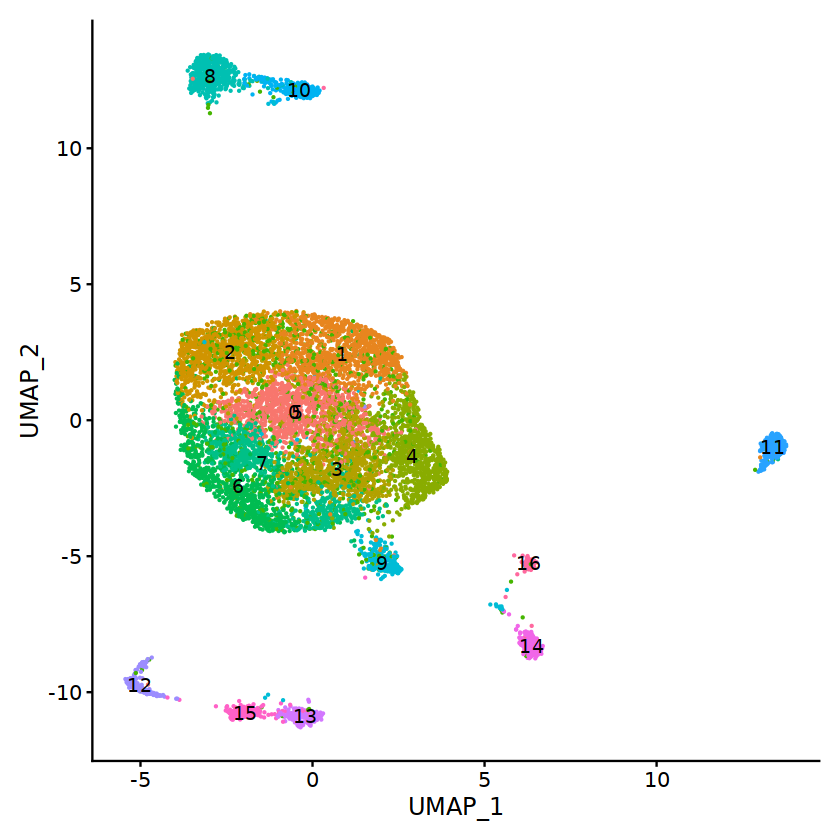

In [27]:
pbmc <- FindNeighbors(object = pbmc, reduction = 'lsi', dims = 2:30)
pbmc <- FindClusters(object = pbmc, algorithm = 3, resolution = 1.2, verbose = FALSE)
DimPlot(object = pbmc, label = TRUE) + NoLegend()

In [28]:
gene.activities <- GeneActivity(pbmc)

Extracting gene coordinates

Extracting reads overlapping genomic regions



In [31]:
pbmc[['RNA']] <- CreateAssayObject(counts = gene.activities)
pbmc <- NormalizeData(
  object = pbmc,
  assay = 'RNA',
  normalization.method = 'LogNormalize',
  scale.factor = median(pbmc$nCount_RNA)
)
DefaultAssay(pbmc) <- 'RNA'

In [39]:
p = FeaturePlot(pbmc, features = c("Ms4a1", "Cd79a", "Cd79b")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/BCells.pdf", height = 7, width = 7, plot = p)

In [40]:
p=FeaturePlot(pbmc, features = c("Dcn", "Col1a2", "Col1a1")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/Fibroblasts.pdf", height = 7, width = 7, plot = p)

In [41]:
p=FeaturePlot(pbmc, features = c("Gypa", "Alas2")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/Erythrocytes.pdf", height = 7, width = 7, plot = p)

In [42]:
p=FeaturePlot(pbmc, features = c("Gata1", "Tfrc", "Blvrb", "Gypa", "Spta1")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/Erythroid.pdf", height = 7, width = 7, plot = p)

In [43]:
p=FeaturePlot(pbmc, features = c("Cdh5", "Vwf", "Cldn5")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/ECs.pdf", height = 7, width = 7, plot = p)

In [44]:
p=FeaturePlot(pbmc, features = c("Tpsab1", "Tpsb2", "Cpa3")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/Mast.pdf", height = 7, width = 7, plot = p)

In [45]:
p=FeaturePlot(pbmc, features = c("Lyz2", "Mnda", "C1qa")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/MPs.pdf", height = 7, width = 7, plot = p)

In [46]:
p=FeaturePlot(pbmc, features = c("Lyz", "Mpo", "Elane")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/GMP.pdf", height = 7, width = 7, plot = p)

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: Lyz"


In [47]:
p=FeaturePlot(pbmc, features = c("Syt1", "Snap25", "Grin1")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/Neurons.pdf", height = 7, width = 7, plot = p)

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: Syt1"


In [48]:
p=FeaturePlot(pbmc, features = c("Sox2", "Pax6", "Dcx")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/NPCs.pdf", height = 7, width = 7, plot = p)

In [49]:
p=FeaturePlot(pbmc, features = c("Tnnt1", "Myl2")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/Myocytes.pdf", height = 7, width = 7, plot = p)

In [50]:
p=FeaturePlot(pbmc, features = c("Epcam", "Cdh1", "Krt8")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/Epithelial.pdf", height = 7, width = 7, plot = p)

In [51]:
p=FeaturePlot(pbmc, features = c("Alb", "Apob", "Apoc1", "Hp")) 
ggsave(filename = "/SGRNJ06/randd/USER/cjj/celedev/atac/20231214mu_peitai/Hepatocytes.pdf", height = 7, width = 7, plot = p)